In [1]:
from pathlib import Path
import h5py
import numpy as np
import fastmri
from matplotlib import pyplot as plt
from fastmri.data import transforms as T
from fastmri.data.subsample import RandomMaskFunc
import os

Visualize PDW knees with and without Fat Supression

In [2]:
download_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed'
train_path = os.path.join(download_path,'multicoil_train')
validation_path = os.path.join(download_path,'multicoil_val')
test_path = os.path.join(download_path,'multicoil_test')
# fully_sampled_test_path = os.path.join(download_path,'multicoil_test_full') # KNEE DOES NOT HAVE THIS!

In [3]:
# Select PD and PDFS file => attrs['acquisition'] = 'CORPD_FBK' and 'CORPDFS_FBK'
train_list = list(Path(train_path).glob('*.h5')) 

# Dictionary to store the selected files
selected_hfs = {
 "AXT1": None,
 "AXT1PRE": None,
 "AXT1POST": None,
 "AXT2": None,
 #"AXFLAIR": None
}
# Iterate through all .h5 files to find matching acquisitions
for file in train_list:
    hf_loop = h5py.File(file, 'r')
    acquisition = hf_loop.attrs.get('acquisition', None) # Safely get the acquisition attribute

    if acquisition in selected_hfs and selected_hfs[acquisition] is None:
        selected_hfs[acquisition] = hf_loop
        print(f"Found {acquisition}:")
        print(dict(hf_loop.attrs))

    # Exit loop early if all acquisitions are found
        if all(selected_hfs.values()):
            break



Found AXT2:
{'acquisition': 'AXT2', 'max': 0.0008646525411650748, 'norm': 0.17105865105062396, 'patient_id': '8cc305cea895657421d5bf63236a9e56b3a5886d61760f798c7eefdebf5405cd'}
Found AXT1POST:
{'acquisition': 'AXT1POST', 'max': 0.001009494855914547, 'norm': 0.20350445080736473, 'patient_id': 'c8ad53e61005d96784d58766e565acaaddef22ce5d3db5f252262087bca5c16f'}
Found AXT1PRE:
{'acquisition': 'AXT1PRE', 'max': 0.0010240159710915302, 'norm': 0.14743352704509305, 'patient_id': '5043c4e74c012f69c3f6c7fd2de99c15d49b981b73110d9461a7bf22b6317bfb'}
Found AXT1:
{'acquisition': 'AXT1', 'max': 0.0012605785188559682, 'norm': 0.15748546928568016, 'patient_id': '46fb7c9d8b9673377f8809840875435e0feccbd3eef0b34f5fc84c123d480e20'}


In [ ]:
# check the shape of the reconstructions
AXT1_hf = selected_hfs['AXT1']
print(AXT1_hf['reconstruction_rss'].shape) # (16, 320, 320)
print(selected_hfs['AXT2']['reconstruction_rss'].shape) # (16, 320, 320)
#print(selected_hfs['AXFLAIR']['reconstruction_rss'].shape) # (16, 320, 320)
print(selected_hfs['AXT1PRE']['reconstruction_rss'].shape) # (14, 320, 320)
print(selected_hfs['AXT1POST']['reconstruction_rss'].shape) # (16, 320, 320)


(16, 320, 320)
(16, 320, 320)
(14, 320, 320)
(16, 320, 320)


Plot via keys() - 'reconstruction_rss'

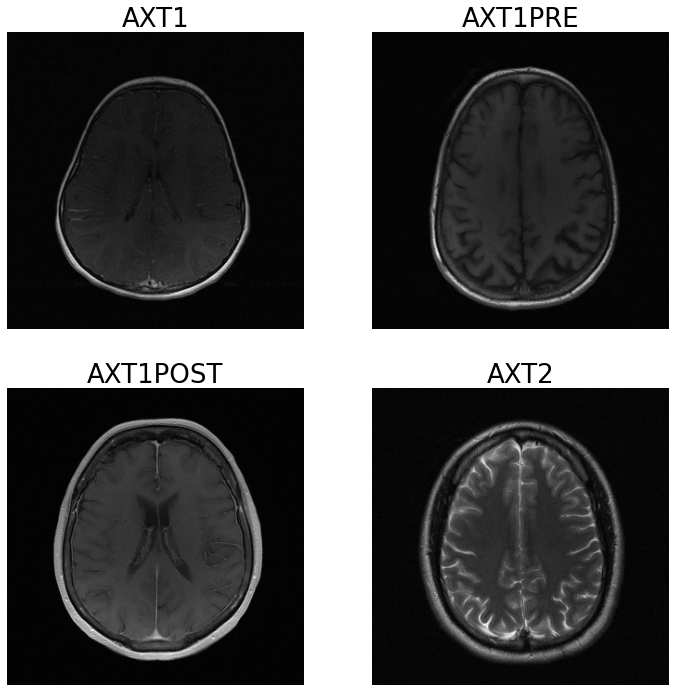

In [10]:
# Increase the font size of the titles
plt.rcParams['axes.titlesize'] = 26


# Slice index to display (from 0 to 14)
slice_idx = 4

# Initialize 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()  # Flatten to index the 2x2 grid


# Titles for each acquisition
# titles = ["AXT1", "AXT1POST", "AXT2", "AXFLAIR"]
titles = ["AXT1", "AXT1PRE", "AXT1POST", "AXT2"]

# Loop through the acquisitions and plot them
for i, (acquisition, hf) in enumerate(selected_hfs.items()):
    if hf is not None:  # Check if the file was found
        # Extract the data from the 'reconstruction_rss' key
        data = hf['reconstruction_rss']
        axs[i].imshow(data[slice_idx], cmap='gray', origin='lower') # origin = lower to match orientation
        axs[i].set_title(titles[i])
    else:
        axs[i].text(0.5, 0.5, 'Not Found', fontsize=12, ha='center')
        axs[i].set_title(titles[i])
    
    axs[i].axis('off')  # Turn off axis for cleaner visualization

# Save and display the figure
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/AX_files.png') 
plt.show()
